# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [44]:
# Dependencies

import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd
import os

# to generate random coordinate
from random import uniform
# to generate city with coordinates
from citipy import citipy
# to fix cities name during the call
from urllib.parse import quote


# import keys
from config import api_key


## Generate Cities List

In [45]:
# random select at least 500 cities
num_of_city = 1500
i = 0;

while i < 1:
    coordinates = [(uniform(-90,90),uniform(-180,180)) for i in range(0,num_of_city)]
    # generate cities from coordiantes
    cities = [(citipy.nearest_city(coordinates[i][0], coordinates[i][1])).city_name for i in range(0,num_of_city)]
    if len(set(cities)) >500:
        i=1
    else:
        i=0
        
cities = list(set(cities))
len(cities)

631

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [46]:
# constructing URL and request 
url = "http://api.openweathermap.org/data/2.5/weather?"
units ="imperial"
query_url = f"{url}appid={api_key}&units={units}&q="

In [47]:
# Setup list for the intesrest info
city = []
lon = []
lat = []
max_temp = []
hum = []
cloud = []
wi_sp = []
country = []
date = []

# counter
counter=1
# not found counter
not_counter=0

print('Beginning Data Retrieval')
print('---------------------')

# API call for each city in the cities
for citi in cities:
    print(f'Processing City # {counter} | {citi}')
    
    try:    
        response = requests.get(query_url + quote(citi)).json()
        city.append(response['name'])
        lon.append(response['coord']['lon'])
        lat.append(response['coord']['lat'])
        max_temp.append(response['main']['temp_max'])
        hum.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wi_sp.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
    except:
        print(f'Cannot find the city of {citi} in this databases...')
        not_counter +=1
    counter +=1
print('---------------------')
print(f'found total of {counter-(1+not_counter)} cities')
print(f'Not found total of {not_counter} cities')
print('Complete Data Retrieval')
    
    

Beginning Data Retrieval
---------------------
Processing City # 1 | derzhavinsk
Processing City # 2 | cap malheureux
Processing City # 3 | finspang
Processing City # 4 | geresk
Cannot find the city of geresk in this databases...
Processing City # 5 | prachuap khiri khan
Processing City # 6 | andenes
Processing City # 7 | sinkat
Cannot find the city of sinkat in this databases...
Processing City # 8 | naron
Processing City # 9 | lucapa
Processing City # 10 | boguchany
Processing City # 11 | pimentel
Processing City # 12 | kabo
Processing City # 13 | lamu
Processing City # 14 | hilo
Processing City # 15 | lolua
Cannot find the city of lolua in this databases...
Processing City # 16 | kanye
Processing City # 17 | hobyo
Processing City # 18 | bubaque
Processing City # 19 | kisangani
Processing City # 20 | port-gentil
Processing City # 21 | narsaq
Processing City # 22 | mazatlan
Processing City # 23 | kayerkan
Processing City # 24 | veraval
Processing City # 25 | villazon
Processing City #

Processing City # 214 | kapaa
Processing City # 215 | essex
Processing City # 216 | huicungo
Processing City # 217 | paamiut
Processing City # 218 | hobart
Processing City # 219 | sitka
Processing City # 220 | dandong
Processing City # 221 | petrove
Processing City # 222 | general cepeda
Processing City # 223 | balkhash
Processing City # 224 | bluff
Processing City # 225 | notse
Processing City # 226 | zhangye
Processing City # 227 | padang
Processing City # 228 | talara
Processing City # 229 | mnogovershinnyy
Processing City # 230 | manakara
Processing City # 231 | borovichi
Processing City # 232 | mataura
Processing City # 233 | cidreira
Processing City # 234 | saint-augustin
Processing City # 235 | aguimes
Processing City # 236 | valparaiso
Processing City # 237 | synya
Processing City # 238 | khatanga
Processing City # 239 | tasiilaq
Processing City # 240 | balakhta
Processing City # 241 | muscat
Processing City # 242 | riyadh
Processing City # 243 | san quintin
Processing City # 2

Processing City # 432 | olinda
Processing City # 433 | broken hill
Processing City # 434 | batagay-alyta
Processing City # 435 | inongo
Processing City # 436 | lehigh acres
Processing City # 437 | yaan
Processing City # 438 | abu samrah
Processing City # 439 | buala
Processing City # 440 | chuy
Processing City # 441 | nanortalik
Processing City # 442 | klaipeda
Processing City # 443 | saint-philippe
Processing City # 444 | olafsvik
Processing City # 445 | bani
Processing City # 446 | kitami
Processing City # 447 | cherskiy
Processing City # 448 | pout
Processing City # 449 | hofn
Processing City # 450 | zyryanka
Processing City # 451 | sikea
Cannot find the city of sikea in this databases...
Processing City # 452 | lasa
Processing City # 453 | east london
Processing City # 454 | cambridge
Processing City # 455 | comodoro rivadavia
Processing City # 456 | manta
Processing City # 457 | salinopolis
Processing City # 458 | munkebo
Processing City # 459 | miraflores
Processing City # 460 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [48]:
cities_df = pd.DataFrame({"City":city,
                          "Lat":lat,
                          "Lng":lon,
                          "Max Temp":max_temp,
                          "Humidity":hum,
                          "Cloudiness":cloud,
                          "Wind Speed":wi_sp,
                          "Country":country,
                          "Date":date,                          
                         })
# save cities_df to CSV file
cities_df.to_csv('output_data\WeatherPy_CSV.csv')
# print(len(cities_df))
cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Derzhavīnsk,51.10,66.32,39.79,69,0,10.56,KZ,1602994267
1,Cap Malheureux,-19.98,57.61,78.01,63,24,8.99,MU,1602994267
2,Finspång,58.71,15.77,39.20,74,51,10.29,SE,1602994267
3,Prachuap Khiri Khan,12.22,99.75,77.00,88,75,5.82,TH,1602993983
4,Andenes,69.31,16.12,35.60,93,75,20.80,NO,1602994268


In [49]:
cities_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,5.780000e+02
mean,22.273080,15.389256,59.730087,72.375433,51.640138,8.205623,1.602994e+09
std,33.133174,89.473361,19.478303,20.662910,38.861911,5.396312,8.117057e+01
min,-54.800000,-175.200000,8.220000,1.000000,0.000000,0.110000,1.602994e+09
25%,-5.157500,-65.307500,44.600000,61.000000,6.000000,4.055000,1.602994e+09
50%,27.445000,21.775000,62.600000,77.000000,56.000000,6.930000,1.602994e+09
75%,50.292500,88.122500,77.000000,88.000000,90.000000,11.315000,1.602994e+09
max,78.220000,179.320000,98.600000,100.000000,100.000000,29.970000,1.602994e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [50]:
cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Derzhavīnsk,51.10,66.32,39.79,69,0,10.56,KZ,1602994267
1,Cap Malheureux,-19.98,57.61,78.01,63,24,8.99,MU,1602994267
2,Finspång,58.71,15.77,39.20,74,51,10.29,SE,1602994267
3,Prachuap Khiri Khan,12.22,99.75,77.00,88,75,5.82,TH,1602993983
4,Andenes,69.31,16.12,35.60,93,75,20.80,NO,1602994268


In [51]:
cities_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,5.780000e+02
mean,22.273080,15.389256,59.730087,72.375433,51.640138,8.205623,1.602994e+09
std,33.133174,89.473361,19.478303,20.662910,38.861911,5.396312,8.117057e+01
min,-54.800000,-175.200000,8.220000,1.000000,0.000000,0.110000,1.602994e+09
25%,-5.157500,-65.307500,44.600000,61.000000,6.000000,4.055000,1.602994e+09
50%,27.445000,21.775000,62.600000,77.000000,56.000000,6.930000,1.602994e+09
75%,50.292500,88.122500,77.000000,88.000000,90.000000,11.315000,1.602994e+09
max,78.220000,179.320000,98.600000,100.000000,100.000000,29.970000,1.602994e+09


In [52]:
# getting Index where Humidity greater than 100
cities_df.index[cities_df['Humidity']>100]

Int64Index([], dtype='int64')

In [53]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
cities_df=cities_df[cities_df['Humidity'] <= 100]

cities_df.reset_index(drop=True)
cities_df.head()
# because data is selected by random. I complete this step anyway

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Derzhavīnsk,51.10,66.32,39.79,69,0,10.56,KZ,1602994267
1,Cap Malheureux,-19.98,57.61,78.01,63,24,8.99,MU,1602994267
2,Finspång,58.71,15.77,39.20,74,51,10.29,SE,1602994267
3,Prachuap Khiri Khan,12.22,99.75,77.00,88,75,5.82,TH,1602993983
4,Andenes,69.31,16.12,35.60,93,75,20.80,NO,1602994268


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Creating a plot function Latitude vs. ?

In [54]:
def plot_lat (df, y, ylabel):
    # this plot is to plat latitude vs y
    # df is the dataframe that contain latitude and y
    # input y and ylable to plot
    
    # setup date for plots
    from datetime import date
    
    fig, ax = plt.subplots(figsize=(8,5))
    ax.scatter( df['Lat'], df[y], alpha=0.5, edgecolors='g')
    ax.set(xlabel ='Latitude',
           ylabel = ylabel,
           title = f'Cities Latitute vs. {ylabel} ({date.today().strftime("%m/%d/%Y")})'
          )
    plt.savefig(f'output_data\Latitude_vs_{ylabel}.png')
    

## Latitude vs. Temperature Plot

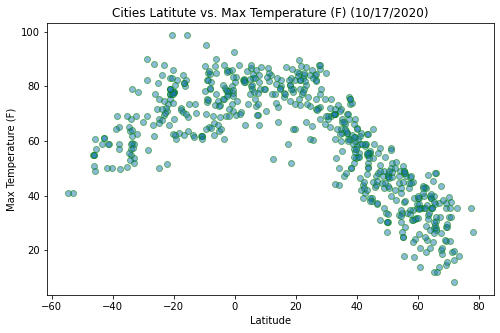

In [55]:
plot_lat(df=cities_df, y='Max Temp',ylabel='Max Temperature (F)' )

## Latitude vs. Humidity Plot

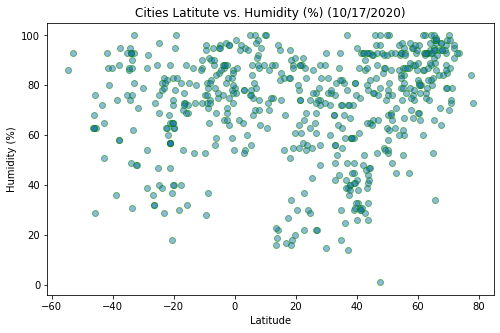

In [56]:
plot_lat(df=cities_df, y='Humidity',ylabel='Humidity (%)' )

## Latitude vs. Cloudiness Plot

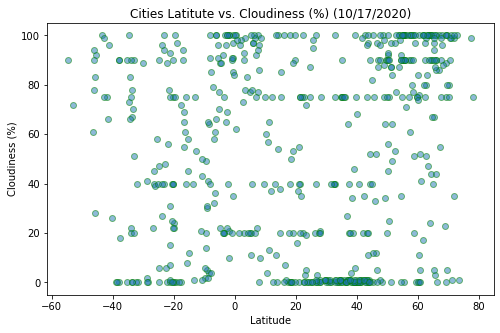

In [57]:
plot_lat(df=cities_df, y='Cloudiness',ylabel='Cloudiness (%)')

## Latitude vs. Wind Speed Plot

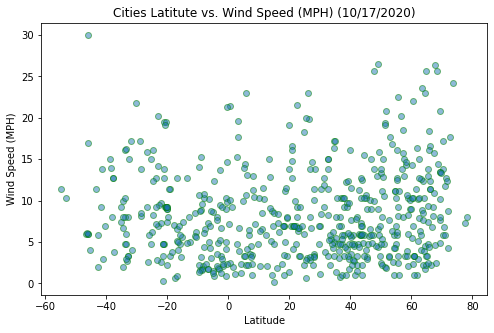

In [58]:

plot_lat(df=cities_df, y='Wind Speed',ylabel='Wind Speed (MPH)')

## Linear Regression

In [59]:
# function for linear requestion
def lin_reg (df1, y1, ylabel1, title1):
       
    #import required library
    from scipy import stats
    
    # find components of the linear regression
    vc_slope, vc_int, r_val, p_val, std_err = stats.linregress(df1['Lat'], df1[y1])
    
    vc_slope=round(vc_slope,2)
    vc_int= round(vc_int,2)
    
    # Create equation of line to calculate predicted weight vs Tumer Volum
    vc_fit = vc_slope * df1['Lat'] + vc_int
    
    #Plotting set up
    fig, ax = plt.subplots(figsize=(8,5))
    ax.scatter( df1['Lat'], df1[y1], alpha=0.5, edgecolors='g')
    ax.set(xlabel ='Latitude',
           ylabel = ylabel1,
           title = title1
          )
    
    ax.plot(df1['Lat'],vc_fit, label=f'y= {vc_slope} * x + {vc_int}', color='r');
    ax.legend();
    
    print(f'R^2 is : {round(r_val**2,2)}')
    print(f'PValue is : {round(p_val,3)}')

    plt.savefig(f'output_data\{title1}.png')
    
    

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [60]:
new_df = cities_df.copy()
north_df = new_df[new_df['Lat']>=0]
south_df = new_df[new_df['Lat']<0]

R^2 is : 0.79
PValue is : 0.0


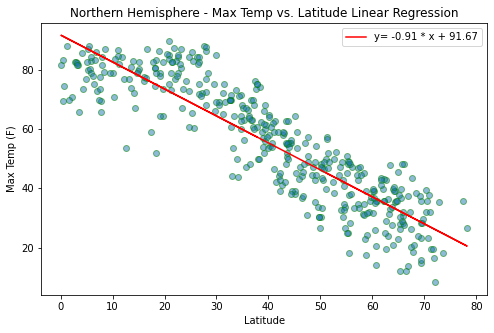

In [61]:
lin_reg(df1=north_df, y1='Max Temp',
        ylabel1='Max Temp (F)', 
        title1='Northern Hemisphere - Max Temp vs. Latitude Linear Regression'
       )

###### R_value proves a strong correlation between Temperature and Latitude. They are inversely proportional. Every degree increases in latitude; the temperature will decrease by 0.95 degrees. It does make sense as the further away from the equator, the colder it gets.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R^2 is : 0.36
PValue is : 0.0


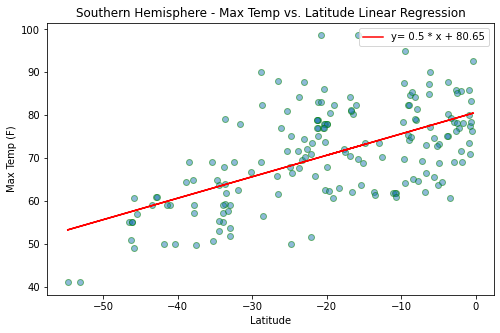

In [62]:
lin_reg(df1=south_df, y1='Max Temp',
        ylabel1='Max Temp (F)', 
        title1='Southern Hemisphere - Max Temp vs. Latitude Linear Regression'
       )

###### R_value proves a strong correlation between latitude and temperature. The southern hemisphere latitude and temperature have a directly proportional relationship. Every degree increase in latitude, temperature increase by 0.71 degrees. It makes sense as the closer it gets to the equator, the hotter it get.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R^2 is : 0.06
PValue is : 0.0


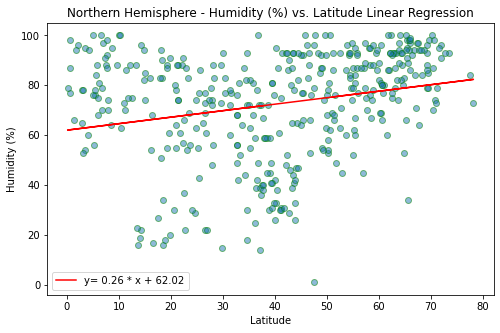

In [63]:
lin_reg(df1=north_df, y1='Humidity',
        ylabel1='Humidity (%)', 
        title1='Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression'
       )

###### It appears the regression line has a positive slope. However, R_value does not show a strong correlation between Humidity and latitude. Other facture shall be investigated before any conclusions can be made

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R^2 is : 0.02
PValue is : 0.057


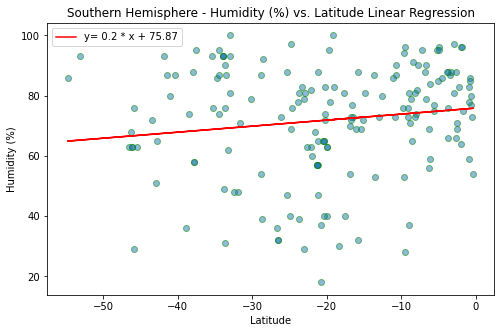

In [64]:
lin_reg(df1=south_df, y1='Humidity',
        ylabel1='Humidity (%)', 
        title1='Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression'
       )

###### It appears the regression line has a nagative slope. However, R_value does not show a strong correlation between Humidity and latitude. Other facture shall be investigated before any conclusions can be made

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R^2 is : 0.06
PValue is : 0.0


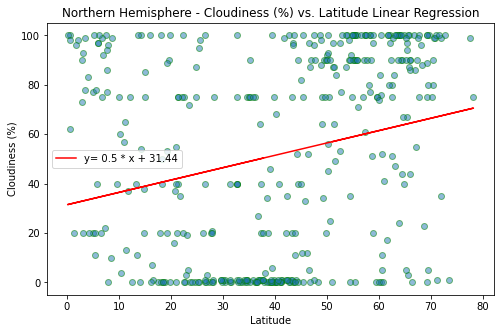

In [65]:
lin_reg(df1=north_df, y1='Cloudiness',
        ylabel1='Cloudiness (%)', 
        title1='Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression'
       )

###### The are scatter all over the graph, there is not strong corelation between the cloudiness and latitude.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R^2 is : 0.0
PValue is : 0.797


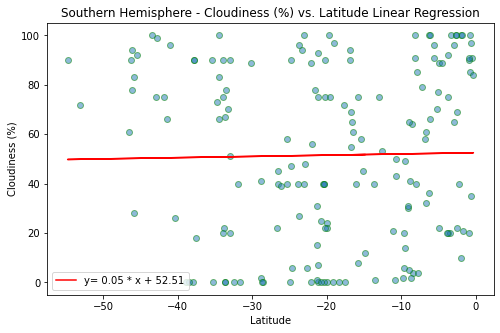

In [66]:
lin_reg(df1=south_df, y1='Cloudiness',
        ylabel1='Cloudiness (%)', 
        title1='Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression'
       )

###### The are scatter all over the graph, there is not strong corelation between the cloudiness and latitude.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [67]:
north_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Derzhavīnsk,51.10,66.32,39.79,69,0,10.56,KZ,1602994267
2,Finspång,58.71,15.77,39.20,74,51,10.29,SE,1602994267
3,Prachuap Khiri Khan,12.22,99.75,77.00,88,75,5.82,TH,1602993983
4,Andenes,69.31,16.12,35.60,93,75,20.80,NO,1602994268
5,Narón,43.52,-8.15,55.00,93,97,5.82,ES,1602994268


R^2 is : 0.02
PValue is : 0.002


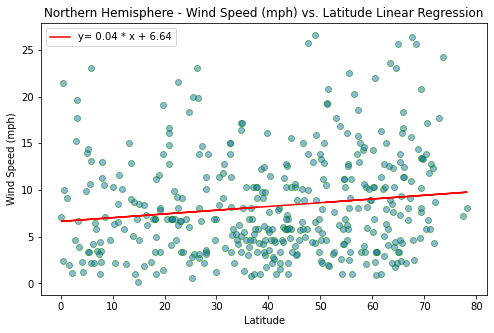

In [68]:
lin_reg(df1=north_df, y1='Wind Speed',
        ylabel1='Wind Speed (mph)', 
        title1='Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression'
       )

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R^2 is : 0.07
PValue is : 0.0


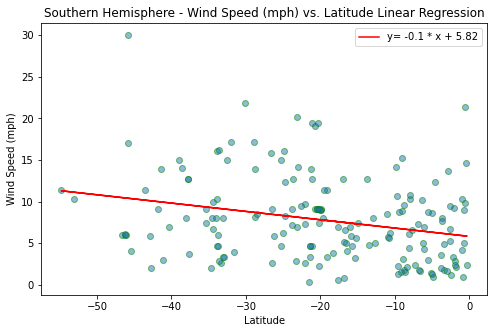

In [69]:
lin_reg(df1=south_df, y1='Wind Speed',
        ylabel1='Wind Speed (mph)', 
        title1='Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression'
       )

###### The are scatter all over the graph, there is not strong corelation between the wind speed and latitude.

In [70]:
cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Derzhavīnsk,51.10,66.32,39.79,69,0,10.56,KZ,1602994267
1,Cap Malheureux,-19.98,57.61,78.01,63,24,8.99,MU,1602994267
2,Finspång,58.71,15.77,39.20,74,51,10.29,SE,1602994267
3,Prachuap Khiri Khan,12.22,99.75,77.00,88,75,5.82,TH,1602993983
4,Andenes,69.31,16.12,35.60,93,75,20.80,NO,1602994268


###### The are scatter all over the graph, there is not strong corelation between the wind speed and latitude.

In [71]:
ax.plot(cities_df['Lng'], cities_df['Lat'])

NameError: name 'plot' is not defined